# Notebook to make Figure 12 

In [ ]:
# Import necessary packages & set-up plotting aesthetics

import numpy as np 
import importlib
import json
import h5ify
import os
import tqdm
import imageio

import matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
from matplotlib import style
style.use('../utils/plotting.mplstyle')
from matplotlib.lines import Line2D

import seaborn as sns
cp = sns.color_palette('muted')
cp2 = sns.color_palette('pastel')
cp3 = sns.color_palette('dark')

import sys
sys.path.append('../utils')
import plotting_functions as pf

# where data is saved
data_dir = '../data/different_total_masses/'

### Setup

Load data

In [1]:
# Load in posteriors
posteriors_dict = h5ify.load(data_dir+'posteriors_different_total_masses.h5'),

# Load in the prior
prior_dict = h5ify.load(data_dir+'../real_and_maxL_GW190521/prior.h5')

# Load in the signals' parameters
injected_params_dict = h5ify.load(data_dir+'parameters_different_total_masses.h5')

Setup plotting aesthetics

In [2]:
# Which total masses to plot
masses = [80, 100, 120, 270, 500]
masses_to_plot = [f'total mass {Mtot}' for Mtot in masses]

# Associated colors and labels
colors = [cp3[6], cp2[6],  'mediumpurple', cp3[0], cp2[0]]
labels = [fr'$M = {Mtot} \, M_\odot$' for Mtot in masses]

# Which cycles to plot
cycles_to_plot = ['-1.0', '0.0', '1.0', '1.5', '2.0']

# For text on figures 
bbox_dict=dict(facecolor='white', edgecolor='silver', boxstyle='round')

# For posterior/prior histograms
chip_ymax = 3.5
hist_bins = np.linspace(pf.xlims['chi_p'][0],  pf.xlims['chi_p'][-1], 30)
prior_hist_kws = dict(histtype='step', density=True, bins=hist_bins, lw=1.5, color='gray', ls=':', zorder=0)

### Make Figure

Top two rows

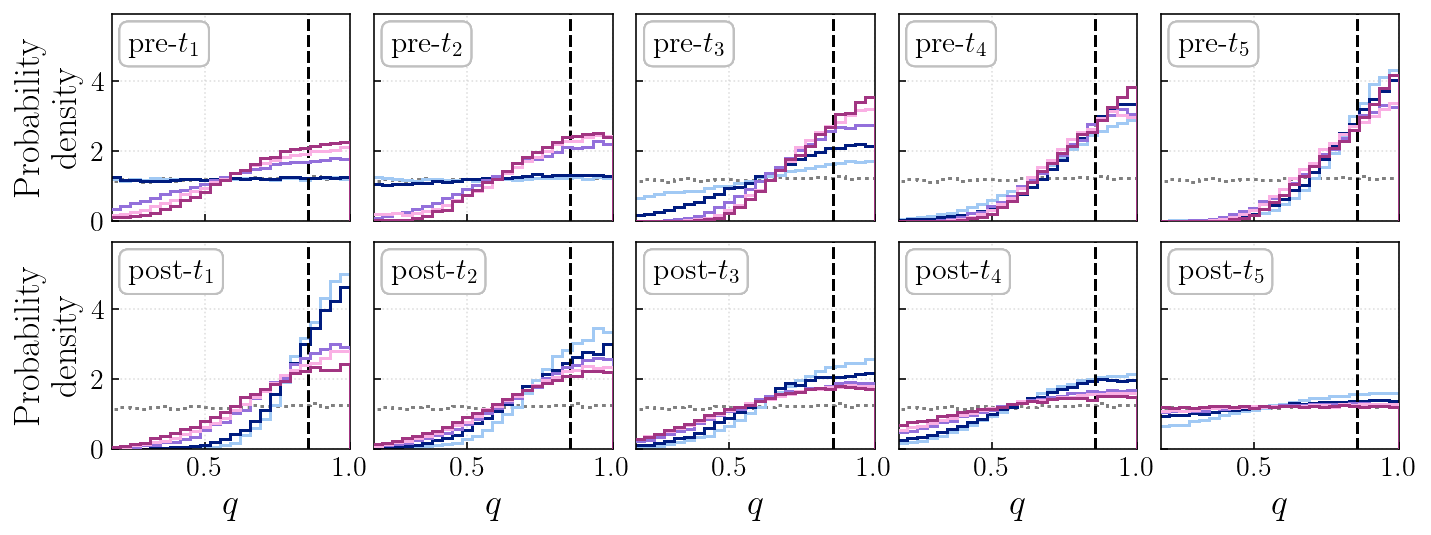

In [3]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize = (pf.DEFAULT_FIG_WIDTH, 4), sharex=True, sharey=True)

# cycle through cutoff times and masses
for i, cycle in enumerate(cycles_to_plot): 

    x = int(i+1)
    tcut_lbl = fr'$t_{x}$'

    for n, mtotal in enumerate(masses_to_plot): 

        color = colors[n]

        # plot chi-p posteriors
        for prepost, _axes in zip(['pre', 'post'], axes): 
            ax = _axes[i]

            t = pf.cycles_to_times_dict[mtotal][cycle]
            posterior = posteriors_dict[0][mtotal][f'{prepost}_{t}']['mass_ratio']

            hist_kws = dict(histtype='step', density=True, bins=hist_bins, lw=1.5, color=color)

            p = 'q'
            pf.plot_posterior(ax, posterior, pf.xlims[p], 5.9, pf.params[p], **hist_kws, zorder=5-n)
            pf.plot_posterior(ax, prior_dict[p], pf.xlims[p], 5.9, pf.params[p], **prior_hist_kws)

            # plot true value
            ax.axvline(injected_params_dict[mtotal][p], color='k', lw=1.5, ls='--')

            # add label for run 
            ax.text(0.07, 0.92, fr'{prepost}-{tcut_lbl}', fontsize=15, bbox=bbox_dict,
                     transform=ax.transAxes, verticalalignment='top', horizontalalignment='left')

            ax.set_xlabel('')
            ax.set_ylabel('')

for ax in axes[1]:
    ax.set_xlabel('$q$')
for ax in axes.T[0]:
    ax.set_ylabel('Probability\ndensity')
    
sp = 0.1
plt.subplots_adjust(hspace=sp, wspace=sp)
plt.savefig('figure_12a.png', dpi=300, bbox_inches='tight')

plt.show()

Bottom two rows

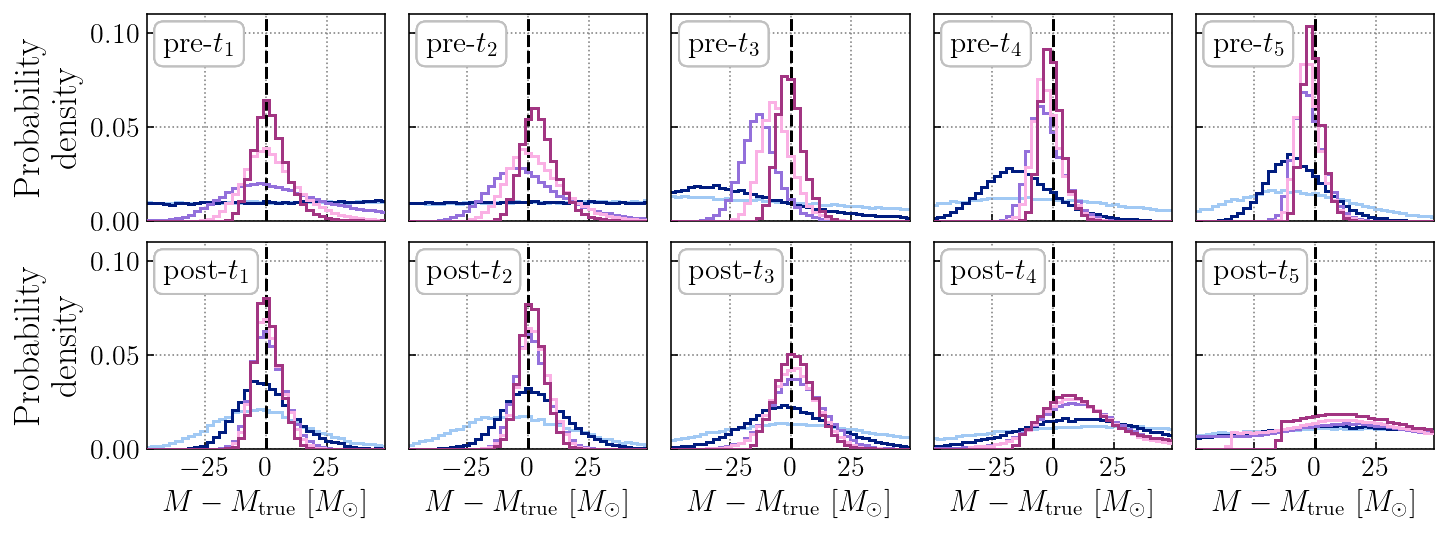

In [4]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize = (pf.DEFAULT_FIG_WIDTH, 4), sharex=True, sharey=True)

# cycle through cutoff times and masses
for i, cycle in enumerate(cycles_to_plot): 

    x = int(i+1)
    tcut_lbl = fr'$t_{x}$'

    for n, mtotal in enumerate(masses_to_plot): 

        color = colors[n]

        # plot chi-p posteriors
        for prepost, _axes in zip(['pre', 'post'], axes): 
            ax = _axes[i]

            t = pf.cycles_to_times_dict[mtotal][cycle]
            posterior = posteriors_dict[0][mtotal][f'{prepost}_{t}']['total_mass'] -  float(mtotal[-3:])

            hist_kws = dict(histtype='step', density=True, lw=1.5, color=color)

            p = 'mtotal'
            ax.hist(posterior, bins=np.linspace(-50,50, 40), **hist_kws, zorder=5-n)

            # plot true value
            ax.axvline(0, color='k', lw=1.5, ls='--')

            # add label for run 
            ax.text(0.07, 0.92, fr'{prepost}-{tcut_lbl}', fontsize=15, bbox=bbox_dict,
                     transform=ax.transAxes, verticalalignment='top', horizontalalignment='left')

            ax.set_xlabel('')
            ax.set_ylabel('')
            ax.set_ylim(0,0.11)
            ax.set_xlim(-49,49)

for ax in axes[1]:
    ax.set_xlabel(r'$M - M_{\rm true}~[M_{\odot}]$', fontsize=15)
for ax in axes.T[0]:
    ax.set_ylabel('Probability\ndensity')
    
sp = 0.1
plt.subplots_adjust(hspace=sp, wspace=sp)

plt.savefig('figure_12b.png', dpi=300, bbox_inches='tight')

plt.show()